In [8]:
# 1,2 & 3
import exercise08 as e8
df = e8.ex08.download_cars('https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv')
df.head

<bound method NDFrame.head of       Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0                   140                143               202   
1                   140                143               202   
2                   140                143               202   
3                   140                143               202   
4                   140                143               202   
...                 ...                ...               ...   
5071                 13                253               201   
5072                141                249               108   
5073                160                249               108   
5074                200                210               110   
5075                200                 94               110   

     Engine Information.Driveline  \
0                 All-wheel drive   
1               Front-wheel drive   
2               Front-wheel drive   
3                 All-wheel drive   
4               

In [19]:
#FEATURE ENGINEERING
#1
make_only_honda = df[df['Identification.Make'] != 'Honda'].index
df.drop(make_only_honda, inplace = True)

#2
fuel_only_gasoline = df[df['Fuel Information.Fuel Type'] != 'Gasoline'].index
df.drop(fuel_only_gasoline, inplace = True)

#3
#Don't understand the question
df['Engine Information.Engine Statistics.Horsepower'] < df['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
101,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,2010 Honda Accord EX-L V-6 Coup,Honda,2010 Honda Accord Coupe,2010,271,251
102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
105,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,2010 Honda Accord EX-L V-6 Coup AT,Honda,2010 Honda Accord Coupe,2010,271,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [16]:
#5 don't understand why function can't be found???
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = [df['Fuel Information.Highway mpg'], df['Engine Information.Engine Statistics.Horsepower']]
d = scaler.fit_transfom(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

AttributeError: 'MinMaxScaler' object has no attribute 'fit_transfom'

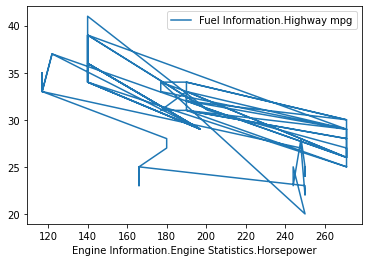

In [24]:
#Linear reg 1
import numpy as np
%matplotlib inline
df.plot(x=16, y=10)

In [30]:
#2 
import sklearn.linear_model
xs = df['Engine Information.Engine Statistics.Horsepower']
ys = df['Fuel Information.Highway mpg']
xs_reshape = np.array(xs).reshape(-1,1)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)
model.coef_
#This describes how the line moves along the y-axis pr x you go on x-axis

array([-0.07521521])

In [33]:
#3
#when x is 250 y is 25 so going by that
intercept = (25-(-0.07521521*250))
print(intercept)
y = -0.07521521*1+43.8038025
print(y)

43.8038025
43.72858729


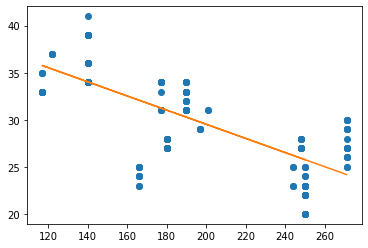

In [39]:
#4
import matplotlib.pyplot as plt
plt.plot(xs, ys, 'o')

m, b = np.polyfit(xs,ys,1)

plt.plot(xs,m*xs +b)